# Logistic Regression (ROC Curve)
## Author : Ashish Kumar Patra

## 1. Import the Required Libraries

In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## 2. Load the Dataset

In [12]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pid = pd.read_csv('C:\\Users\\ASHISH\\Desktop\\DataSets\\pima-indians-diabetes.data',header=None,names=col_names)
pid.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Extract Features

In [13]:
pid.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

In [14]:
feature_columns = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']

In [15]:
x = pid[feature_columns]
y = pid.label

## 4. Split Data into Train and Test

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
x_train.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


## 5. Train a Logistic Model

In [17]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

## 6. Predict the Model

In [18]:
y_pred_class = model.predict(x_test)
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## 7. Evaluate the Model
### Classification Report

In [19]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred_class))
print(accuracy_score(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

0.7835497835497836


### Confusion Matrix

### Basic Terminology for Confusion Matrix
True Positives (TP): 

True Negatives (TN):

False Positives (FP): 

* Falsely Predict Positive

Type I Error

False Negatives (FN): 


* Falsely Predict Negative

Type II Error

0: Negative Class

1: Positive Class

In [21]:
print(metrics.confusion_matrix(y_test,y_pred_class))

[[132  14]
 [ 36  49]]


### Manual Calculation for Confusion Matrix

In [22]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[132  14]
 [ 36  49]]


### Metrics Computed from a Confusion Matrix
Classification Accuracy: Overall, how often is the classifier correct ?

In [23]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7835497835497836
0.7835497835497836


Classification Error: Overall, how often is the classifier incorrect ?

Also known as "Misclassification Rate".

In [25]:
classification_error = (FP + FN) / float (TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.21645021645021645
0.21645021645021645


Sensitivity: When the actual value is positive, how often is the prediction correct ?

In [27]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.5764705882352941
0.5764705882352941


Specificity: When the actual value is negative, how often is the prediction correct ?

In [28]:
specificity = TN / (TN + FP)

print(specificity)

0.9041095890410958


False Positive Rate: When the actual value is negative, how often is the prediction incorrect ?

In [29]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.0958904109589041
0.09589041095890416


Precision: When a positive value is predicted, how often is the prediction correct ?

How "precise" is the classifier when predicting positive instances ?

In [31]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.7777777777777778
0.7777777777777778


## 8. Receiver Operating Characteristic (ROC) Curves

In [48]:
y_pred_prob = model.predict_proba(x_test)[:, 1]
y_pred_prob[:10]

array([0.41959875, 0.30405225, 0.14604922, 0.05500166, 0.20951735,
       0.27802641, 0.35719024, 0.10413004, 0.1650331 , 0.21120035])

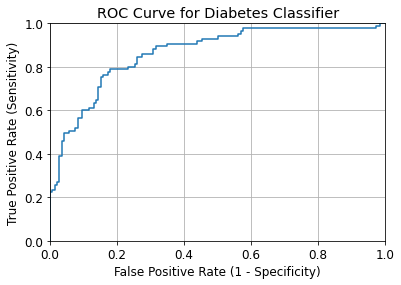

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Diabetes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Define a Function that accepts a Threshold and Prints Sensitivity and Specificity

In [51]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [52]:
evaluate_threshold(0.5)

Sensitivity: 0.5647058823529412
Specificity: 0.904109589041096


In [53]:
evaluate_threshold(0.3)

Sensitivity: 0.8
Specificity: 0.7671232876712328


In [54]:
evaluate_threshold(0.6)

Sensitivity: 0.5176470588235295
Specificity: 0.9178082191780822
